# Machine Learning: A Primer for Radiologists

## Contents

* Machine Learning Basics
* Machine Learning Workflow
* Commonly Used Models
* Notes and Tips
* Applications in Radiology

### Machine Learning Basics
* Unsupervised and Supervised
* Bias and Variance
* Model Specification and Training
* Training and Testing
* Example: Linear Regression
  * Input and Output
  * Parameter Estimation
  * Training and Testing

#### Unsupervised and Supervised Learning

| Unsupervised | Supervised |
| :-------------: | :-------------:|
| Aims to "summarize" data  | Aims to "learn" a function or parameters of a function as a map between input data and output/prediction |
| Methods to reduce dimensionality of data | Methods to train a system for prediction |
| Clustering, Compression, Association Rules | Regression |

#### Supervised Learning
* One of the most well known cases - linear regression
* Task is to "learn" the values of a linear model that best fits the data

<br>
<br>
 <center> $$ Y = mx + b $$ </center>
<br>
<br>

* Our goal here is to estimate what values of $m$ and $b$ best fit the data

#### Supervised Learning

<table>
  <tr>
    <td> Classification by nearest neighbor voting </td>
    <th rowspan="2" style="width:40%"><img src="assets/images/knn_regression.png" alt='knn_regression'></th>
  </tr>
  <tr>
    <td> A function of 2-dimensional input space is "learned" based on the majority voting of the 15 nearest neighbors in the dataset. <p> $$Y(x_{1}, x_{2}) = \frac{1}{k} \sum_{x_{i} \in N_{k}(k)} y_{i}$$ </p> </td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<a href="#/2">Back to top</a>
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 2, Page 7</p>
</footer>

#### Unsupervised and Supervised Learning
<table>
  <tr>
    <td>These methods are not exclusive of each other and can compliment each other!</td>
    <th rowspan="2" style="width:55%"><img src="assets/images/gene_expression_regression.jpg" alt='gene_express'></th>
  </tr>
  <tr>
    <td>Example: reducing gene expression data to summarize the most important gene expression patterns of a dataset (unsupervised), which is then used to estimate survival (supervised).</td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<a href="#/2">Back to top</a>
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 16 Page 29</p>
</footer>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

x = np.linspace(0, 500.0, num=50)
x += abs(x.min()) + 1.0
y = np.log(x) + np.random.normal(scale=0.25,size=(x.size,))

p_lin = np.polyfit(x, y, 1)
p_high = np.polyfit(x, y, 32)
p_lin_y = np.polyval(p_lin, x)
p_high_y = np.polyval(p_high, x)

/home/matt/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: RankWarning: Polyfit may be poorly conditioned


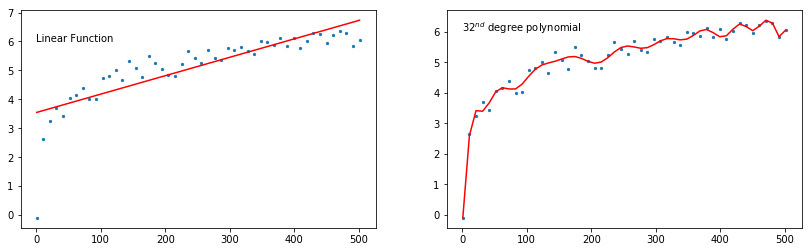

In [9]:
fig = plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(x, y, s=5)
plt.text(0.05, 6.0, 'Linear Function')
plt.plot(x, p_lin_y, color='r')

plt.subplot(122)
plt.scatter(x, y, s=5)
plt.plot(x, p_high_y, color='r')
plt.text(0.05, 6.0 , '$32^{ nd }$ degree polynomial')
fig.savefig(os.path.join('assets', 'images', 'bias_var.png'), bbox_inches='tight')
plt.show()

 <h2> <center> <left> High bias </left> vs  <right> high variance </right>  </center> </h2>

![pic](assets/images/bias_var.png)

In [168]:
def cost(predictions, ground_truth):
    total_cost = 0.0
    for i in range(len(predictions)):
        total_cost += (1.0 / 2.0) * (predictions[i] - ground_truth[i])**2.0
    
    total_cost /= float(len(predictions))
    return total_cost
    

def hypothesis_function(m, x, b):
    h = m * x + b
    return h

def gradients(m, b, x, ground_truth):
    m_gradient = 0.0
    b_gradient = 0.0
    
    predictions = []
    
    for i in range(len(x)):
        predictions.append(hypothesis_function(m, x[i], b))
    
    for i in range(len(x)):
        error = predictions[i] - ground_truth[i]
        m_gradient += error * x[i]
        b_gradient += error * 1.0
        
    m_gradient /= float(len(x))
    b_gradient /= float(len(x))
    
    return m_gradient, b_gradient

def update_parameters(m, b, m_gradient, b_gradient, alpha):
    m_updated = m - (m_gradient * alpha)
    b_updated = b - (b_gradient * alpha)
    
    return m_updated, b_updated


def run_gradient_descent(x, y, m_init, b_init, alpha=0.01, num_iteration=1500, tol=1e-4):
    
    m = m_init
    b = b_init
    
    m_vals = []
    b_vals = []
    costs = []
    
    for iteration_num in range(num_iteration):
        #save the current values of m and b
        m_vals.append(m)
        b_vals.append(b)
        
        #make our predictions
        predictions = []
        for i in range(len(x)):
            predictions.append(hypothesis_function(m, x[i], b))
        
        #compute the cost and save it
        current_cost = cost(predictions, y)
        costs.append(current_cost)
        
        if current_cost < tol: #check if we are done
            break
        else: 
            #compute the gradients
            m_grad, b_grad = gradients(m, b, x, y)
        
            #update parameters m and b
            m_new, b_new = update_parameters(m, b, m_grad, b_grad, alpha)
 
            #reset m and b
            m = m_new
            b = b_new
            
    return m_vals, b_vals, costs
        
        
    

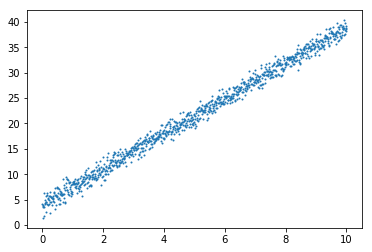

In [169]:
m_true = 3.5
b_true = 4.0

x = np.linspace(0, 10.0, num=1000)
y = x * m_true + b_true + np.random.normal(scale=1.0,size=(x.size,))

plt.scatter(x, y,s=1.0)
plt.show()

In [191]:
mv, bv, c = run_gradient_descent(x, y, -1.0, 8.0)

In [192]:
c

[255.3849486930682,
 112.58522366062482,
 50.572830203730639,
 23.639352790905459,
 11.937618597457389,
 6.8497337670416671,
 4.6336995265629959,
 3.6646924741107636,
 3.2371935566210577,
 3.0448573078104313,
 2.9546644868113083,
 2.9088562948025811,
 2.8823529704264517,
 2.8642644048652737,
 2.8498618168422682,
 2.837091752270239,
 2.8250624187651723,
 2.8133864329263352,
 2.8018954328812349,
 2.7905161594360912,
 2.7792166489389611,
 2.7679828695360551,
 2.7568085763348096,
 2.7456909063835511,
 2.7346284659523392,
 2.7236205000024043,
 2.7126665315557434,
 2.7017662051011451,
 2.6909192185956332,
 2.6801252939350309,
 2.6693841641283771,
 2.6586955677253981,
 2.6480592463933323,
 2.6374749438613017,
 2.6269424054584349,
 2.6164613779099111,
 2.6060316092449556,
 2.5956528487534647,
 2.5853248469637862,
 2.575047355629704,
 2.5648201277214033,
 2.5546429174182084,
 2.544515480102099,
 2.5344375723515888,
 2.5244089519357482,
 2.5144293778083364,
 2.5044986101020323,
 2.49461641012259

In [193]:
mv[-1]

3.4658041735334391

In [194]:
bv[-1]

4.1918001639528724

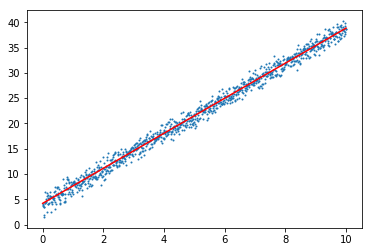

In [195]:
plt.plot(x, mv[-1]*x + bv[-1], 'r')
plt.scatter(x,y, s=1.0)
plt.show()

In [196]:
%%javascript

UsageError: %%javascript is a cell magic, but the cell body is empty.


In [205]:

from ipywidgets import interact

#fig = plt.figure(figsize=(9,6))

@interact(index=(0, len(mv)-1, 10))
def update_plot(index):
    
    y_hat = mv[index] * x + bv[index]
    
    fig = plt.figure(figsize=(9,6))
    plt.scatter(x,y,s=1.0,c='blue')
    plt.plot(x, y_hat, 'r')
    plt.text(0.05, 30.0, r'y = {mv:.2f} x + {bv:.2f}'.format(mv=mv[index], bv=bv[index]))
    plt.ylim(0.0, 45.0)
    plt.show()
    

In [156]:
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib inline
x = [1,2,5,4,3]
@interact(n=(2,5))
def f(n):
    plt.plot(x[:n])
    plt.show()